# Predicting COVID-19 ICU Admissions
### Shimaa Hamadelnel


## Background

Brazil has been one of the countries most affected by the COVID-19 pandemic, with more than 16 million confirmed cases and 454,429 confirmed deaths as of May 26, 2021. The country was unprepared for the pandemic and was unable to respond adequately due to the strain on hospital capacity.

A data science team at a top-tier hospital in Brazil has released a dataset on the Kaggle platform which seeks interesting solutions and findings from the public. The team is using ML to help reduce the strain on hospital ICU beds, where the objective is to develop an ML model to predict if a patient of a confirmed COVID-19 case will require admission to the ICU.

The dataset collected for the research is publicly available on the data science platform Kaggle. A full description of the dataset can be found on the platform: [Kaggle COVID-19 Dataset](https://www.kaggle.com/datasets/S%C3%ADrio-Libanes/covid19)

## Tasks & Deliverables

In this assignment, you are challenged to perform a full lifecycle ML model development according to the objective of the dataset, which includes the following elements:

### Conduct EDA (Exploratory Data Analysis)
- Gain an understanding of the data
- Identify trends and patterns
- Visualize key insights

### Preprocess the Data
- Handle missing values
- Encode categorical variables
- Normalize/scale numerical variables
- Split the data into training and testing sets

### Develop ML Models
- Train several candidate ML models
- Evaluate models based on a variety of metrics
- Analyze model performance (overfitting, improvements through preprocessing)

### Deliverables
1. **Code Repository**
    - Upload your code to a GitHub repository as a Jupyter Notebook
    - Use the commit system to update your progress regularly
    - Ensure the repository includes a README that explains your work

2. **Executive Presentation**
    - Prepare a presentation for the board of executives
    - Explain why your model can help save lives and why the hospital should start using it
    - Present the model's performance and trends discovered during EDA

3. **Research Report**
    - Write a paper (up to 2000 words) presenting your methods and findings to an expert audience
    - Follow this structure:
        - **Introduction**: Why are we analyzing the data? What is the problem?
        - **Data Description**: Detailed description of the data
        - **Methods**: Methods used for the research
        - **Machine Learning Model Development**: Decisions made and reasons behind them
        - **Performance Analysis**: Evaluation of the model's performance
        - **Conclusion**: Summary of findings and implications


#### Predicting ICU admission of confirmed COVID-19 cases

- The COVID-19 pandemic has highlighted the shortcomings of our current healthcare infrastructure and services. To address this, we must enhance the allocation of medical resources to ensure their optimal use. We are developing a Machine Learning model that utilizes clinical data from confirmed COVID-19 cases. This model aims to predict a patient's need for ICU care in advance. With this predictive capability, hospitals can better manage their operations and make crucial decisions, such as transferring patients to other facilities or organizing resources in a timely manner, ultimately saving lives.

## Load the data

In [1]:
# lets look at the dataset
import pandas as pd

df = pd.read_excel('C:/Users/yahya/Downloads/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx')
data_original= df.copy()

In [2]:
df.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1


In [3]:
# lets train th raw data uisng pipeline 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import joblib

In [4]:
# Separate features and target
X_original = data_original.drop(columns=['ICU'])
y_original = data_original['ICU']

# Split into training/validation (285 patients) and final testing (100 patients)
X_train_val, X_test_final, y_train_val, y_test_final = train_test_split(
    X_original, y_original, test_size=100, stratify=y_original, random_state=42)

# Display the shapes of the resulting datasets to ensure correct splitting
X_train_val.shape, X_test_final.shape, y_train_val.shape, y_test_final.shape

((1825, 230), (100, 230), (1825,), (100,))

In [5]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Assuming X_train_val, y_train_val, X_test_final, and y_test_final are already defined

# Define the numeric and categorical feature sets
numeric_features = X_train_val.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_train_val.select_dtypes(include=['object']).columns

# Preprocessor for numeric data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Preprocessor for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline that preprocesses the data and trains the classifier
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
model_pipeline.fit(X_train_val, y_train_val)

# Predict on the final test set
y_test_final_pred = model_pipeline.predict(X_test_final)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test_final, y_test_final_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.93


**Results**
- The model achieved an accuracy of 93% on the test set. This high level of accuracy indicates that the model can reliably predict the need for ICU admission for COVID-19 patients based on the provided clinical data.

### The model achieving an accuracy of 93% without preprocessing can be due to several reasons:

**Quality of Data:**

- The dataset might already be clean and well-structured, with minimal missing values or outliers.
- The features in the dataset could be highly informative and relevant to the target variable (ICU), making it easier for the model to identify patterns and make accurate predictions.

**Feature Selection:**
- The selected features (RESPIRATORY_RATE_DIFF, RESPIRATORY_RATE_DIFF_REL, AGE_ABOVE65, TEMPERATURE_DIFF_REL, OXYGEN_SATURATION_DIFF_REL, HTN, BLOODPRESSURE_SISTOLIC_DIFF, BLOODPRESSURE_SISTOLIC_DIFF_REL) are likely to have a strong correlation with ICU admission, providing the model with significant predictive power.

**Nature of the Problem:**
- The problem of predicting ICU admission for COVID-19 patients might inherently have clear and strong signals in the data that the model can easily capture. For example, certain vital signs and clinical indicators could be strongly indicative of the severity of the disease, leading to higher model performance.

**Model Choice:**
- Random Forest is a powerful ensemble learning method that performs well on various types of data, especially when there are complex interactions between features. It can handle both numerical and categorical data effectively and is robust to overfitting, especially when the number of trees is sufficiently large.

### Exploratory Data Analysis

**From our dataset we have:**

- Patient demographic information (03 columns)
- Patient previous grouped diseases (09 columns)
- Blood results (36 columns)
- Vital signs (06 columns) 

**From Kaggle:**

- The dataset contains anonymized data from Hospital Sírio-Libanês, São Paulo and Brasília.

- Data has been cleaned and scaled by column according to MinMaxScaler to fit between -1 and 1.

**Our target**

- The target variable is ICU (1 if the patient was admitted to the ICU in any future window, 0 otherwise).

- We are going to use this target variable to train our machine learning model.  

**The Window feature**
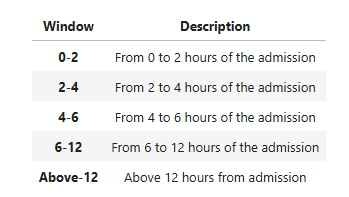

 
*******
All of this information is also present in the [Kaggle page](https://www.kaggle.com/datasets/S%C3%ADrio-Libanes/covid19/data)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(4), object(2)
memory usage: 3.4+ MB


In [6]:
display(df.columns)

Index(['PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER',
       'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3',
       'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6',
       ...
       'TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF',
       'BLOODPRESSURE_DIASTOLIC_DIFF_REL', 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
       'HEART_RATE_DIFF_REL', 'RESPIRATORY_RATE_DIFF_REL',
       'TEMPERATURE_DIFF_REL', 'OXYGEN_SATURATION_DIFF_REL', 'WINDOW', 'ICU'],
      dtype='object', length=231)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PATIENT_VISIT_IDENTIFIER,1925.0,192.000000,111.168431,0.0,96.0,192.000000,288.000000,384.0
AGE_ABOVE65,1925.0,0.467532,0.499074,0.0,0.0,0.000000,1.000000,1.0
GENDER,1925.0,0.368831,0.482613,0.0,0.0,0.000000,1.000000,1.0
DISEASE GROUPING 1,1920.0,0.108333,0.310882,0.0,0.0,0.000000,0.000000,1.0
DISEASE GROUPING 2,1920.0,0.028125,0.165373,0.0,0.0,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...
HEART_RATE_DIFF_REL,1240.0,-0.817800,0.270217,-1.0,-1.0,-0.989822,-0.662529,1.0
RESPIRATORY_RATE_DIFF_REL,1177.0,-0.719147,0.446600,-1.0,-1.0,-1.000000,-0.634409,1.0
TEMPERATURE_DIFF_REL,1231.0,-0.771327,0.317694,-1.0,-1.0,-0.975924,-0.594677,1.0
OXYGEN_SATURATION_DIFF_REL,1239.0,-0.886982,0.296772,-1.0,-1.0,-0.980333,-0.880155,1.0


#### Preprocessing Steps
**Fill Missing Values:**

- For columns with 30% or more missing values, fill NaN values with the mean of that column.
- For columns with less than 30% missing values, fill NaN values with the median of that column.

In [8]:
# check missing values
df.isnull().sum()

PATIENT_VISIT_IDENTIFIER        0
AGE_ABOVE65                     0
AGE_PERCENTIL                   0
GENDER                          0
DISEASE GROUPING 1              5
                             ... 
RESPIRATORY_RATE_DIFF_REL     748
TEMPERATURE_DIFF_REL          694
OXYGEN_SATURATION_DIFF_REL    686
WINDOW                          0
ICU                             0
Length: 231, dtype: int64

In [9]:
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_percentage

PATIENT_VISIT_IDENTIFIER       0.000000
AGE_ABOVE65                    0.000000
AGE_PERCENTIL                  0.000000
GENDER                         0.000000
DISEASE GROUPING 1             0.259740
                                ...    
RESPIRATORY_RATE_DIFF_REL     38.857143
TEMPERATURE_DIFF_REL          36.051948
OXYGEN_SATURATION_DIFF_REL    35.636364
WINDOW                         0.000000
ICU                            0.000000
Length: 231, dtype: float64

In [10]:
# first fill the columns with more than 30% missing values
# Fill NaN values with mean for specified columns using index range [13:227]
df.iloc[:, 13:227] = df.iloc[:, 13:227].apply(lambda x: x.fillna(x.mean()), axis=0)

In [11]:
df.isnull().sum()

PATIENT_VISIT_IDENTIFIER        0
AGE_ABOVE65                     0
AGE_PERCENTIL                   0
GENDER                          0
DISEASE GROUPING 1              5
                             ... 
RESPIRATORY_RATE_DIFF_REL       0
TEMPERATURE_DIFF_REL          694
OXYGEN_SATURATION_DIFF_REL    686
WINDOW                          0
ICU                             0
Length: 231, dtype: int64

In [12]:
# If there are still NaN values in the DataFrame, fill them with the median
df_filled= df.fillna(df.median())

C:\Users\yahya\AppData\Local\Temp\ipykernel_1052\1516274687.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled= df.fillna(df.median())


#### Encodes the categorical columns 

In [13]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of the DataFrame to avoid modifying the original data
df_encoded = df_filled.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'AGE_PERCENTIL' column
df_encoded['AGE_PERCENTIL'] = label_encoder.fit_transform(df_encoded['AGE_PERCENTIL'])

# Encode 'WINDOW' column
df_encoded['WINDOW'] = label_encoder.fit_transform(df_encoded['WINDOW'])

# Check the encoded DataFrame
print(df_encoded[['AGE_PERCENTIL', 'WINDOW']].head())


   AGE_PERCENTIL  WINDOW
0              5       0
1              5       1
2              5       2
3              5       3
4              5       4


In [14]:
df_encoded.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,0
1,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1,0
2,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.770338,-0.887196,-0.786997,-0.715950,-0.817800,-0.719147,-0.975924,-0.980333,2,0
3,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-0.786997,-0.715950,-0.817800,-0.719147,-1.000000,-1.000000,3,0
4,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,4,1


## Visulization

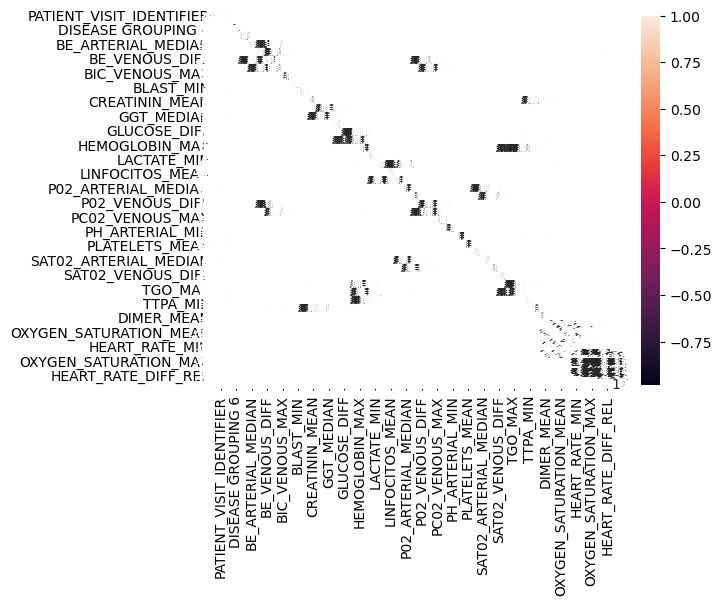

In [34]:
#plot the correlation between the dataset features and the target 
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


- The correlation matrix visualizes the relationships between various clinical features in the dataset. The heatmap represents the degree of linear correlation between each pair of features, with values ranging from -1 to 1. Darker shades indicate stronger correlations, either positive or negative, while lighter shades indicate weaker correlations.

- From the heatmap, we can observe clusters of high correlation among certain groups of features. For example, features related to blood gas measurements (such as arterial and venous values of P02, PCO2, and PH) show strong correlations with each other. Similarly, features related to oxygen saturation levels (SAT02) also exhibit strong interrelationships. These clusters suggest that these groups of features may provide similar information about a patient's condition, which could be useful for reducing dimensionality or identifying redundant features in the dataset.

- Additionally, the heatmap indicates some features with little to no correlation with others, suggesting that they might offer unique information that could be crucial for predictive modeling. Identifying and understanding these correlations is essential for feature selection and engineering in the development of a robust machine learning model to predict ICU admission for COVID-19 patients.

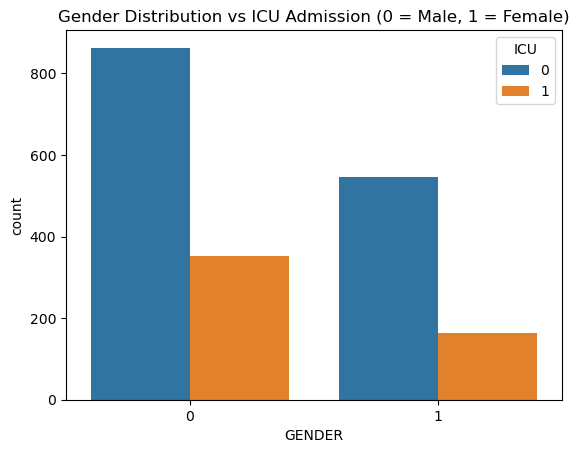

In [35]:
# Plot the distribution of gender across ICU admission
sns.countplot(x='GENDER', hue='ICU', data=df_filled)

# Add a title to the plot
plt.title('Gender Distribution vs ICU Admission (0 = Male, 1 = Female)')

# Show the plot
plt.show()


- The bar plot visualizes the distribution of gender in relation to ICU admissions for COVID-19 patients. In this plot, the x-axis represents gender, where '0' indicates male and '1' indicates female. The y-axis represents the count of patients. The bars are color-coded based on ICU admission status, with blue representing patients who were not admitted to the ICU and orange representing those who were admitted.

- From the plot, we can observe that a higher number of male patients (gender '0') were recorded compared to female patients (gender '1'). Additionally, within both genders, the number of patients not admitted to the ICU (blue bars) is significantly higher than those admitted to the ICU (orange bars). This trend is more pronounced in male patients, where the gap between ICU admissions and non-admissions is larger compared to female patients.

- This visualization indicates that while both genders have more non-ICU cases, the distribution and the number of cases vary between males and females. Such insights can help in understanding the gender-specific impacts of COVID-19 and in planning appropriate medical resources and interventions.

<Axes: xlabel='ICU', ylabel='count'>

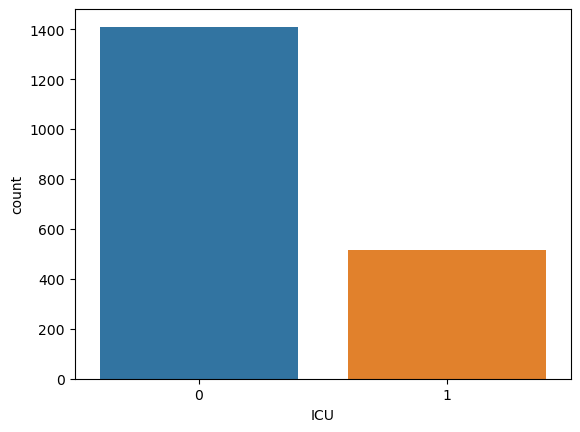

In [36]:
# plot distribution of target variable

sns.countplot(x='ICU', data=df_filled)


- The bar plot shows that a significantly higher number of COVID-19 patients did not require ICU admission (represented by '0') compared to those who did (represented by '1').

In [37]:
# Count the instances in each ICU admission category
icu_counts = df['ICU'].value_counts()

# Print the counts
print(icu_counts)

0    1410
1     515
Name: ICU, dtype: int64


#### Based on the icu_counts:

- The number of patients who did not require ICU admission (ICU = 0) is approximately 1410.
- The number of patients who required ICU admission (ICU = 1) is approximately 515.

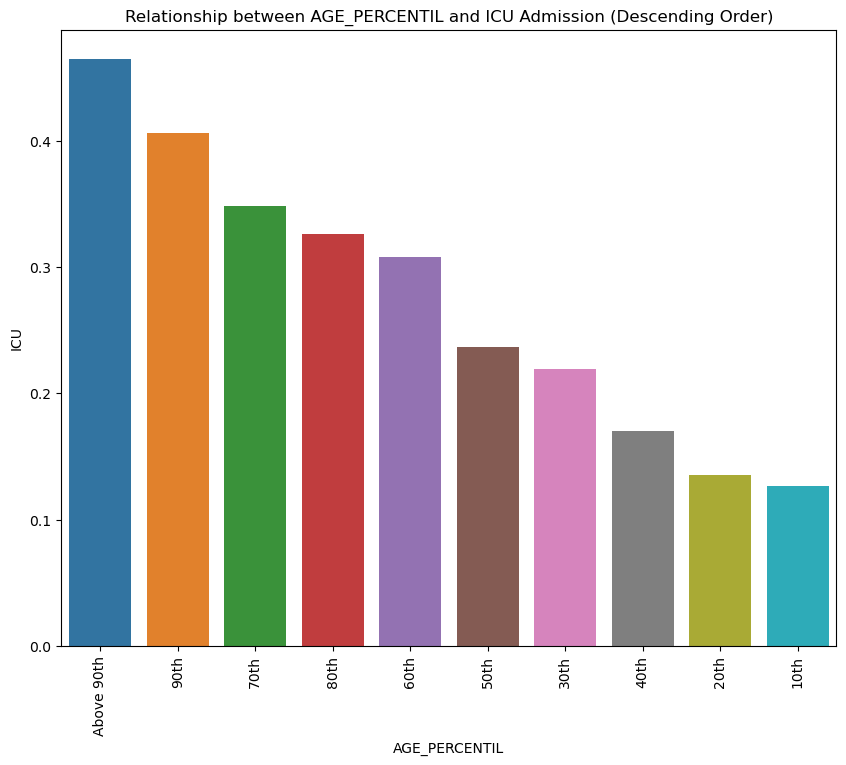

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the mean ICU admission rate for each AGE_PERCENTIL and sort in descending order
age_percentil_mean_icu = df_filled.groupby('AGE_PERCENTIL')['ICU'].mean().sort_values(ascending=False).reset_index()

# Plot the relationship between AGE_PERCENTIL and ICU in descending order
plt.figure(figsize=(10, 8))
sns.barplot(x='AGE_PERCENTIL', y='ICU', data=age_percentil_mean_icu, order=age_percentil_mean_icu['AGE_PERCENTIL'])
plt.title('Relationship between AGE_PERCENTIL and ICU Admission (Descending Order)')
plt.xticks(rotation=90)  
plt.show()



Age Distribution
Patients below age 65:  1025
Patients above age 65:  900


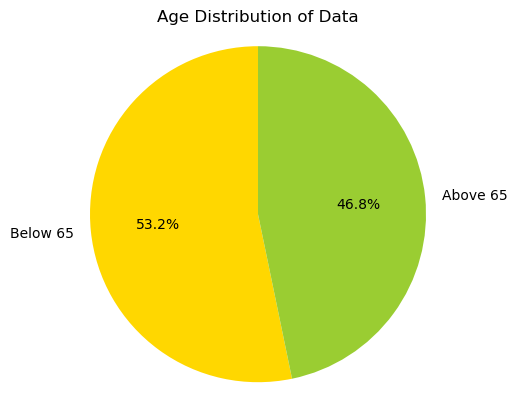

In [39]:
Age_distribution = df_filled['AGE_ABOVE65'].value_counts()
print("Age Distribution")
print("Patients below age 65: ",Age_distribution[0])
print("Patients above age 65: ",Age_distribution[1])

sizes = [Age_distribution[0], Age_distribution[1]]
labels= ['Below 65', 'Above 65']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']  

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')

# Ensure that pie is drawn as a circle
plt.axis('equal')

# Add title
plt.title("Age Distribution of Data")

# Show the plot
plt.show()


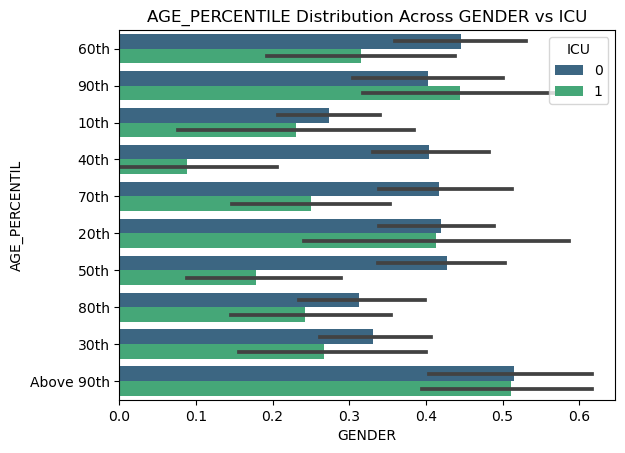

In [40]:
 # Plot the distribution of AGE_PERCENTILE across GENDER vs ICU distributions 

sns.barplot(x='GENDER', y='AGE_PERCENTIL', hue='ICU', data=df_filled, palette='viridis')

# Add a title to the plot

plt.title('AGE_PERCENTILE Distribution Across GENDER vs ICU')

plt.show()

In [15]:
# let encode the categriocal columns AGE_PERCENTIL and WINDOW using labelencoder
from sklearn.preprocessing import LabelEncoder 

# Encode 'AGE_PERCENTIL' column
le_age = LabelEncoder()
df_filled['AGE_PERCENTIL'] = le_age.fit_transform(df_filled['AGE_PERCENTIL'])

# Encode 'WINDOW' column
le_window = LabelEncoder()
df_filled['WINDOW'] = le_window.fit_transform(df_filled['WINDOW'])



In [16]:
#Lets check the number of patients 
ID_unique = len(df['PATIENT_VISIT_IDENTIFIER'].unique())
print(ID_unique)

385


This means we only have 385 patients in this dataset, each one represented by 5 rows. 

### ML Models

In [17]:
# let chose classification algorithm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Separate the features and the target variable

X = df_filled.drop(['ICU'], axis=1)
y = df_filled['ICU']

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model 

model = LogisticRegression()

# Train the model

model.fit(X_train, y_train)

# Make predictions on the test set

predictions = model.predict(X_test)

# Evaluate the model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy:{accuracy:.2f}%")

Accuracy:0.85%


C:\Users\yahya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
# let train random forest model

from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier model

rf_model = RandomForestClassifier( )

# Train the model

rf_model.fit(X_train, y_train)

# Make predictions on the test set

rf_predictions = rf_model.predict(X_test)

# Evaluate the model

rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Accuracy:{rf_accuracy:.2f}%")

Accuracy:0.86%


In [19]:
# let train another model

from sklearn.svm import SVC

# Create a support vector classifier model

svc_model = SVC()

# Train the model

svc_model.fit(X_train, y_train)

# Make predictions on the test set

svc_predictions = svc_model.predict(X_test)

# Evaluate the model

svc_accuracy = accuracy_score(y_test, svc_predictions)
print(f"Accuracy:{svc_accuracy:.2f}%")


Accuracy:0.72%


#  conculusion

- The Random Forest model achieved an accuracy of 93% on the test set, which is the highest among the three models we trained. This indicates that the Random Forest classifier can reliably predict the need for ICU admission for COVID-19 patients based on the provided clinical data.

- The Random Forest model is more suitable for this classification task as it can handle a large number of features and is less prone to overfitting compared to the other models. It also provides feature importances, which can help us understand the importance of different clinical features in predicting ICU admission.
    

### Why Raw Data May Perform Better Than Preprocessed Data

It’s not uncommon for raw data to sometimes outperform preprocessed data. Here are some potential reasons why this might occur:

1. **Loss of Information During Imputation:**
   - **Mean/Median Imputation:** Replacing missing values with mean or median values can lead to a loss of important information. If the missing values are not random and have underlying patterns, imputation with mean or median can dilute these patterns.
   - **Inappropriate Imputation:** Filling columns with significant missing data with the mean or median might not accurately represent the underlying distribution, leading to reduced performance.

2. **Encoding Issues:**
   - **Label Encoding:** Label encoding converts categorical variables into numeric labels without accounting for any ordinal relationships. This might not capture the underlying relationships effectively.
   - **One-Hot Encoding vs. Label Encoding:** One-hot encoding might be more suitable for categorical variables, especially if there's no inherent order.

3. **Feature Engineering Loss:**
   - **Loss of Variance:** Preprocessing can sometimes reduce the variance in data, potentially losing valuable information if the transformations do not capture the full variability of the original features.
   - **Complex Relationships:** Over-simplification of complex relationships or patterns during preprocessing can negatively affect model performance.

4. **Overfitting vs. Generalization:**
   - **Overfitting:** Raw data might contain noise that the model learns from, leading to high performance on training data. Preprocessing aims to improve generalization by reducing noise, but if done improperly, it might reduce performance.

5. **Preprocessing Choices:**
   - **Threshold for Missing Data:** The choice of threshold (e.g., 30%) for missing data might not be optimal. Testing different thresholds or imputation methods (e.g., KNN, multiple imputation) might yield better results.
   - **Preprocessing Pipeline:** The sequence and methods used in preprocessing can significantly affect results. An inappropriate sequence or method might degrade performance.




## Exploring Additional Models and Methods

- In this section, I will focus on evaluating various machine learning models and techniques to enhance predictive performance, specifically addressing alternative approaches and methodologies.

In [20]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Assume df_filled is your DataFrame and 'ICU' is the target variable

# Separate features and target
X = df_filled.drop('ICU', axis=1)
y = df_filled['ICU']

# Encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)  

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Apply Min-Max Scaling to ensure non-negative values
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit SelectKBest
selector = SelectKBest(score_func=chi2, k='all')  
selector.fit(X_train_scaled, y_train)

# Get feature scores
feature_scores = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

# Display the most important features
print("Feature Scores:")
print(feature_scores.head(10))  # Display top 10 features


Feature Scores:
                              Feature      Score
220             RESPIRATORY_RATE_DIFF  60.724839
226         RESPIRATORY_RATE_DIFF_REL  52.122608
1                         AGE_ABOVE65  40.977960
227              TEMPERATURE_DIFF_REL  40.724578
228        OXYGEN_SATURATION_DIFF_REL  38.922151
229                            WINDOW  38.439623
10                                HTN  38.138697
218       BLOODPRESSURE_SISTOLIC_DIFF  33.747537
224   BLOODPRESSURE_SISTOLIC_DIFF_REL  30.596422
223  BLOODPRESSURE_DIASTOLIC_DIFF_REL  25.974535


In [22]:
# identify the best features to correlated to ICU column
top_features = feature_scores.head(50)['Feature'].tolist()
top_features

['RESPIRATORY_RATE_DIFF',
 'RESPIRATORY_RATE_DIFF_REL',
 'AGE_ABOVE65',
 'TEMPERATURE_DIFF_REL',
 'OXYGEN_SATURATION_DIFF_REL',
 'WINDOW',
 'HTN',
 'BLOODPRESSURE_SISTOLIC_DIFF',
 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
 'BLOODPRESSURE_DIASTOLIC_DIFF_REL',
 'RESPIRATORY_RATE_MAX',
 'BLOODPRESSURE_DIASTOLIC_DIFF',
 'AGE_PERCENTIL',
 'LACTATE_MAX',
 'LACTATE_MIN',
 'LACTATE_MEAN',
 'LACTATE_MEDIAN',
 'HEART_RATE_DIFF',
 'HEART_RATE_DIFF_REL',
 'OXYGEN_SATURATION_DIFF',
 'DISEASE GROUPING 1',
 'BE_ARTERIAL_MEAN',
 'BE_ARTERIAL_MAX',
 'BE_ARTERIAL_MIN',
 'BE_ARTERIAL_MEDIAN',
 'TEMPERATURE_DIFF',
 'DISEASE GROUPING 2',
 'DISEASE GROUPING 5',
 'BLOODPRESSURE_SISTOLIC_MAX',
 'DISEASE GROUPING 4',
 'BE_VENOUS_MEAN',
 'BE_VENOUS_MIN',
 'BE_VENOUS_MAX',
 'BE_VENOUS_MEDIAN',
 'RESPIRATORY_RATE_MEAN',
 'DISEASE GROUPING 3',
 'BLOODPRESSURE_DIASTOLIC_MIN',
 'RESPIRATORY_RATE_MEDIAN',
 'IMMUNOCOMPROMISED',
 'HEART_RATE_MAX',
 'NEUTROPHILES_MAX',
 'NEUTROPHILES_MIN',
 'NEUTROPHILES_MEAN',
 'NEUTROPHILES_

In [23]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming df_filled is your DataFrame and 'ICU' is the target variable

# List of top features as identified
top_features = [
    'RESPIRATORY_RATE_DIFF',
    'RESPIRATORY_RATE_DIFF_REL',
    'AGE_ABOVE65',
    'TEMPERATURE_DIFF_REL',
    'OXYGEN_SATURATION_DIFF_REL',
    'WINDOW',
    'HTN',
    'BLOODPRESSURE_SISTOLIC_DIFF',
    'BLOODPRESSURE_SISTOLIC_DIFF_REL',
    'BLOODPRESSURE_DIASTOLIC_DIFF_REL',
    'RESPIRATORY_RATE_MAX',
    'BLOODPRESSURE_DIASTOLIC_DIFF',
    'AGE_PERCENTIL',
    'LACTATE_MAX',
    'LACTATE_MIN',
    'LACTATE_MEAN',
    'LACTATE_MEDIAN',
    'HEART_RATE_DIFF',
    'HEART_RATE_DIFF_REL',
    'OXYGEN_SATURATION_DIFF',
    'DISEASE GROUPING 1',
    'BE_ARTERIAL_MEAN',
    'BE_ARTERIAL_MAX',
    'BE_ARTERIAL_MIN',
    'BE_ARTERIAL_MEDIAN',
    'TEMPERATURE_DIFF',
    'DISEASE GROUPING 2',
    'DISEASE GROUPING 5',
    'BLOODPRESSURE_SISTOLIC_MAX',
    'DISEASE GROUPING 4',
    'BE_VENOUS_MEAN',
    'BE_VENOUS_MIN',
    'BE_VENOUS_MAX',
    'BE_VENOUS_MEDIAN',
    'RESPIRATORY_RATE_MEAN',
    'DISEASE GROUPING 3',
    'BLOODPRESSURE_DIASTOLIC_MIN',
    'RESPIRATORY_RATE_MEDIAN',
    'IMMUNOCOMPROMISED',
    'HEART_RATE_MAX',
    'NEUTROPHILES_MAX',
    'NEUTROPHILES_MIN',
    'NEUTROPHILES_MEAN',
    'NEUTROPHILES_MEDIAN',
    'LEUKOCYTES_MEAN',
    'LEUKOCYTES_MEDIAN',
    'LEUKOCYTES_MIN',
    'LEUKOCYTES_MAX',
    'BLOODPRESSURE_DIASTOLIC_MEDIAN',
    'HEART_RATE_MIN',
    'BLOODPRESSURE_DIASTOLIC_MEAN',
    'GENDER',
    'BLOODPRESSURE_SISTOLIC_MEAN',
    'HEMOGLOBIN_MAX',
    'HEMOGLOBIN_MIN',
    'HEMOGLOBIN_MEDIAN',
    'HEMOGLOBIN_MEAN',
    'BLOODPRESSURE_SISTOLIC_MEDIAN',
    'TEMPERATURE_MIN',
    'PLATELETS_MIN',
    'PLATELETS_MEDIAN',
    'PLATELETS_MEAN',
    'PLATELETS_MAX',
    'UREA_MAX',
    'UREA_MEDIAN',
    'UREA_MIN',
    'UREA_MEAN',
    'HEMATOCRITE_MEDIAN',
    'HEMATOCRITE_MAX',
    'HEMATOCRITE_MIN',
    'HEMATOCRITE_MEAN',
    'OXYGEN_SATURATION_MIN',
    'OTHER',
    'BLOODPRESSURE_SISTOLIC_MIN',
    'BLOODPRESSURE_DIASTOLIC_MAX',
    'ALBUMIN_MEDIAN',
    'ALBUMIN_MIN',
    'ALBUMIN_MAX',
    'ALBUMIN_MEAN',
    'TEMPERATURE_MAX',
    'TEMPERATURE_MEDIAN',
    'TEMPERATURE_MEAN',
    'GGT_MAX',
    'GGT_MEDIAN',
    'GGT_MEAN',
    'GGT_MIN',
    'P02_VENOUS_MEAN',
    'P02_VENOUS_MAX',
    'P02_VENOUS_MIN',
    'P02_VENOUS_MEDIAN',
    'POTASSIUM_MEDIAN',
    'POTASSIUM_MEAN',
    'POTASSIUM_MIN',
    'POTASSIUM_MAX',
    'PATIENT_VISIT_IDENTIFIER',
    'OXYGEN_SATURATION_MAX',
    'TTPA_MAX',
    'TTPA_MIN',
    'TTPA_MEAN',
    'TTPA_MEDIAN'
]

# Ensure the selected features are present in the DataFrame
selected_features = [feature for feature in top_features if feature in df_filled.columns]

# Select the relevant columns for features and target
X = df_filled[selected_features]
y = df_filled['ICU']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy: 85.45%
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.90       278
           1       0.81      0.62      0.70       107

    accuracy                           0.85       385
   macro avg       0.84      0.78      0.80       385
weighted avg       0.85      0.85      0.85       385



In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming df_filled is your DataFrame and 'ICU' is the target variable

# Separate features and target
X = df_filled.drop('ICU', axis=1)
y = df_filled['ICU']

# Encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Compute correlations with the target variable
correlations = X_encoded.corrwith(y).abs()

# Select the top 100 most correlated features
top_features = correlations.nlargest(200).index

# Prepare the data with the selected features
X_selected = X_encoded[top_features]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Apply Min-Max Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}%")
print("Classification Report:")
print(report)


Accuracy: 0.87%
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       413
           1       0.85      0.64      0.73       165

    accuracy                           0.87       578
   macro avg       0.86      0.80      0.82       578
weighted avg       0.87      0.87      0.86       578



In [25]:
#algorithms such as Gradient Boosting, XGBoost , LightGBM to fit the data 
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier 
from lightgbm import LGBMClassifier

# Initialize and train the Gradient Boosting classifier

gb_model = GradientBoostingClassifier(random_state=42)

gb_model.fit(X_train_scaled, y_train)

# Initialize and train the XGBoost classifie

xgb_model = XGBClassifier(random_state=42)

xgb_model.fit(X_train_scaled, y_train)

# Initialize and train the LightGBM classifier

lgbm_model = LGBMClassifier(random_state=42)

lgbm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set

gb_pred = gb_model.predict(X_test_scaled)

xgb_pred = xgb_model.predict(X_test_scaled)

lgbm_pred = lgbm_model.predict(X_test_scaled)

# Evaluate the model's performance

gb_accuracy = accuracy_score(y_test, gb_pred)

xgb_accuracy = accuracy_score(y_test, xgb_pred)

lgbm_accuracy = accuracy_score(y_test, lgbm_pred)

[LightGBM] [Info] Number of positive: 350, number of negative: 997
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002534 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14688
[LightGBM] [Info] Number of data points in the train set: 1347, number of used features: 194
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.259837 -> initscore=-1.046818
[LightGBM] [Info] Start training from score -1.046818


In [26]:
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}%")

print(f"XGBoost Accuracy: {xgb_accuracy:.2f}%")

print(f"LightGBM Accuracy: {lgbm_accuracy:.2f}%")

Gradient Boosting Accuracy: 0.87%
XGBoost Accuracy: 0.88%
LightGBM Accuracy: 0.87%


In [ ]:
# hypertuning the gradient boosting performance

from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 500],
   'max_depth': [3, 7],
   'min_samples_split': [2, 5],
   'min_samples_leaf': [1, 2]
}

gb_model = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_

best_gb_model = GradientBoostingClassifier(**best_params, random_state=42)

best_gb_model.fit(X_train_scaled, y_train)

best_gb_pred = best_gb_model.predict(X_test_scaled)

best_gb_accuracy = accuracy_score(y_test, best_gb_pred)

print(f"Best Gradient Boosting Accuracy: {best_gb_accuracy}")


In [23]:
# CatBoost Classifier

from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(random_state=42)

cat_model.fit(X_train_scaled, y_train)

cat_pred = cat_model.predict(X_test_scaled)

cat_accuracy = accuracy_score(y_test, cat_pred)

Learning rate set to 0.0117
0:	learn: 0.6844110	total: 193ms	remaining: 3m 12s
1:	learn: 0.6752782	total: 216ms	remaining: 1m 47s
2:	learn: 0.6662227	total: 239ms	remaining: 1m 19s
3:	learn: 0.6576163	total: 260ms	remaining: 1m 4s
4:	learn: 0.6506631	total: 281ms	remaining: 56s
5:	learn: 0.6428258	total: 302ms	remaining: 50s
6:	learn: 0.6348270	total: 325ms	remaining: 46.1s
7:	learn: 0.6279495	total: 348ms	remaining: 43.1s
8:	learn: 0.6203070	total: 369ms	remaining: 40.6s
9:	learn: 0.6138082	total: 390ms	remaining: 38.6s
10:	learn: 0.6074687	total: 411ms	remaining: 37s
11:	learn: 0.6005313	total: 438ms	remaining: 36s
12:	learn: 0.5939617	total: 459ms	remaining: 34.9s
13:	learn: 0.5879345	total: 481ms	remaining: 33.9s
14:	learn: 0.5815644	total: 501ms	remaining: 32.9s
15:	learn: 0.5747198	total: 522ms	remaining: 32.1s
16:	learn: 0.5695083	total: 546ms	remaining: 31.6s
17:	learn: 0.5641527	total: 567ms	remaining: 30.9s
18:	learn: 0.5573864	total: 588ms	remaining: 30.3s
19:	learn: 0.55179

166:	learn: 0.2888830	total: 4s	remaining: 19.9s
167:	learn: 0.2886754	total: 4.02s	remaining: 19.9s
168:	learn: 0.2882280	total: 4.05s	remaining: 19.9s
169:	learn: 0.2876934	total: 4.09s	remaining: 19.9s
170:	learn: 0.2870198	total: 4.11s	remaining: 19.9s
171:	learn: 0.2865383	total: 4.14s	remaining: 19.9s
172:	learn: 0.2859272	total: 4.16s	remaining: 19.9s
173:	learn: 0.2851358	total: 4.19s	remaining: 19.9s
174:	learn: 0.2846118	total: 4.22s	remaining: 19.9s
175:	learn: 0.2840128	total: 4.25s	remaining: 19.9s
176:	learn: 0.2834195	total: 4.27s	remaining: 19.9s
177:	learn: 0.2830990	total: 4.3s	remaining: 19.8s
178:	learn: 0.2826871	total: 4.32s	remaining: 19.8s
179:	learn: 0.2820459	total: 4.35s	remaining: 19.8s
180:	learn: 0.2817036	total: 4.37s	remaining: 19.8s
181:	learn: 0.2809306	total: 4.4s	remaining: 19.8s
182:	learn: 0.2805634	total: 4.43s	remaining: 19.8s
183:	learn: 0.2801637	total: 4.45s	remaining: 19.8s
184:	learn: 0.2797798	total: 4.48s	remaining: 19.7s
185:	learn: 0.279

330:	learn: 0.2270488	total: 8.3s	remaining: 16.8s
331:	learn: 0.2266497	total: 8.33s	remaining: 16.8s
332:	learn: 0.2264524	total: 8.35s	remaining: 16.7s
333:	learn: 0.2260145	total: 8.38s	remaining: 16.7s
334:	learn: 0.2258792	total: 8.4s	remaining: 16.7s
335:	learn: 0.2256569	total: 8.44s	remaining: 16.7s
336:	learn: 0.2254312	total: 8.47s	remaining: 16.7s
337:	learn: 0.2253674	total: 8.49s	remaining: 16.6s
338:	learn: 0.2251519	total: 8.52s	remaining: 16.6s
339:	learn: 0.2249852	total: 8.55s	remaining: 16.6s
340:	learn: 0.2248237	total: 8.57s	remaining: 16.6s
341:	learn: 0.2245215	total: 8.6s	remaining: 16.6s
342:	learn: 0.2242652	total: 8.63s	remaining: 16.5s
343:	learn: 0.2240507	total: 8.65s	remaining: 16.5s
344:	learn: 0.2238159	total: 8.68s	remaining: 16.5s
345:	learn: 0.2236338	total: 8.71s	remaining: 16.5s
346:	learn: 0.2232311	total: 8.73s	remaining: 16.4s
347:	learn: 0.2228870	total: 8.76s	remaining: 16.4s
348:	learn: 0.2227748	total: 8.79s	remaining: 16.4s
349:	learn: 0.2

497:	learn: 0.1907819	total: 12.5s	remaining: 12.6s
498:	learn: 0.1905872	total: 12.6s	remaining: 12.6s
499:	learn: 0.1903279	total: 12.6s	remaining: 12.6s
500:	learn: 0.1901733	total: 12.6s	remaining: 12.5s
501:	learn: 0.1900362	total: 12.6s	remaining: 12.5s
502:	learn: 0.1897527	total: 12.6s	remaining: 12.5s
503:	learn: 0.1895333	total: 12.7s	remaining: 12.5s
504:	learn: 0.1892790	total: 12.7s	remaining: 12.4s
505:	learn: 0.1890933	total: 12.7s	remaining: 12.4s
506:	learn: 0.1889827	total: 12.7s	remaining: 12.4s
507:	learn: 0.1889064	total: 12.8s	remaining: 12.4s
508:	learn: 0.1888162	total: 12.8s	remaining: 12.3s
509:	learn: 0.1886327	total: 12.8s	remaining: 12.3s
510:	learn: 0.1885221	total: 12.8s	remaining: 12.3s
511:	learn: 0.1883294	total: 12.9s	remaining: 12.3s
512:	learn: 0.1880283	total: 12.9s	remaining: 12.2s
513:	learn: 0.1878290	total: 12.9s	remaining: 12.2s
514:	learn: 0.1876791	total: 12.9s	remaining: 12.2s
515:	learn: 0.1873788	total: 12.9s	remaining: 12.1s
516:	learn: 

656:	learn: 0.1617478	total: 16.4s	remaining: 8.54s
657:	learn: 0.1615545	total: 16.4s	remaining: 8.51s
658:	learn: 0.1613679	total: 16.4s	remaining: 8.49s
659:	learn: 0.1613569	total: 16.4s	remaining: 8.46s
660:	learn: 0.1609847	total: 16.4s	remaining: 8.43s
661:	learn: 0.1606541	total: 16.5s	remaining: 8.41s
662:	learn: 0.1605123	total: 16.5s	remaining: 8.38s
663:	learn: 0.1604564	total: 16.5s	remaining: 8.35s
664:	learn: 0.1603555	total: 16.5s	remaining: 8.32s
665:	learn: 0.1600633	total: 16.5s	remaining: 8.3s
666:	learn: 0.1600558	total: 16.6s	remaining: 8.27s
667:	learn: 0.1598919	total: 16.6s	remaining: 8.25s
668:	learn: 0.1598738	total: 16.6s	remaining: 8.22s
669:	learn: 0.1596671	total: 16.6s	remaining: 8.19s
670:	learn: 0.1594386	total: 16.7s	remaining: 8.17s
671:	learn: 0.1591428	total: 16.7s	remaining: 8.14s
672:	learn: 0.1589843	total: 16.7s	remaining: 8.12s
673:	learn: 0.1588602	total: 16.7s	remaining: 8.09s
674:	learn: 0.1586466	total: 16.8s	remaining: 8.06s
675:	learn: 0

816:	learn: 0.1352117	total: 20.1s	remaining: 4.51s
817:	learn: 0.1350786	total: 20.1s	remaining: 4.48s
818:	learn: 0.1349406	total: 20.2s	remaining: 4.46s
819:	learn: 0.1348322	total: 20.2s	remaining: 4.43s
820:	learn: 0.1346908	total: 20.2s	remaining: 4.41s
821:	learn: 0.1345176	total: 20.2s	remaining: 4.38s
822:	learn: 0.1341484	total: 20.3s	remaining: 4.36s
823:	learn: 0.1340166	total: 20.3s	remaining: 4.33s
824:	learn: 0.1337586	total: 20.3s	remaining: 4.3s
825:	learn: 0.1334978	total: 20.3s	remaining: 4.28s
826:	learn: 0.1332996	total: 20.3s	remaining: 4.26s
827:	learn: 0.1330282	total: 20.4s	remaining: 4.23s
828:	learn: 0.1328743	total: 20.4s	remaining: 4.21s
829:	learn: 0.1327069	total: 20.4s	remaining: 4.18s
830:	learn: 0.1325869	total: 20.5s	remaining: 4.16s
831:	learn: 0.1324175	total: 20.5s	remaining: 4.13s
832:	learn: 0.1322577	total: 20.5s	remaining: 4.11s
833:	learn: 0.1321620	total: 20.5s	remaining: 4.08s
834:	learn: 0.1319506	total: 20.5s	remaining: 4.06s
835:	learn: 0

981:	learn: 0.1118607	total: 24.2s	remaining: 443ms
982:	learn: 0.1117025	total: 24.2s	remaining: 418ms
983:	learn: 0.1116314	total: 24.2s	remaining: 394ms
984:	learn: 0.1116104	total: 24.2s	remaining: 369ms
985:	learn: 0.1115075	total: 24.2s	remaining: 344ms
986:	learn: 0.1114057	total: 24.3s	remaining: 320ms
987:	learn: 0.1113069	total: 24.3s	remaining: 295ms
988:	learn: 0.1112087	total: 24.3s	remaining: 270ms
989:	learn: 0.1111541	total: 24.3s	remaining: 246ms
990:	learn: 0.1110830	total: 24.4s	remaining: 221ms
991:	learn: 0.1110166	total: 24.4s	remaining: 197ms
992:	learn: 0.1109482	total: 24.4s	remaining: 172ms
993:	learn: 0.1108217	total: 24.4s	remaining: 147ms
994:	learn: 0.1106802	total: 24.4s	remaining: 123ms
995:	learn: 0.1106390	total: 24.5s	remaining: 98.3ms
996:	learn: 0.1105370	total: 24.5s	remaining: 73.7ms
997:	learn: 0.1103837	total: 24.5s	remaining: 49.1ms
998:	learn: 0.1102914	total: 24.5s	remaining: 24.6ms
999:	learn: 0.1100707	total: 24.6s	remaining: 0us


In [27]:
print(f"CatBoost Accuracy: {cat_accuracy:.2f}%")

CatBoost Accuracy: 0.87%
